# Метод главных компонент (Principal Component Analysis)

## Описание проекта

Метод главных компонент (PCA) - это популярный статистический метод, используемый для уменьшения размерности данных, обнаружения скрытых паттернов, визуализации и классификации. В данном проекте мы работаем с изображениями цифр, написанных вручную.

## Цель проекта  
Выяснить с помощью метода главных компонент, какие написанные от руки цифры наиболее сильно отличаются друг от друга.

## Описание данных  

Данные представляют изображения цифр, написанных от руки. Каждая строка исходных данных представляет собой множество признаков, описывающих отдельные пиксели изображения цифры. Эти признаки используются, чтобы узнать, какие цифры наиболее сильно отличаются друг от друга после применения PCA.

Источник данных: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

## Заключение  
Метод главных компонент позволяет выделить главные оси выделенной информации, основываясь на дисперсии данных, что позволяет визуализировать и классифицировать цифры наиболее эффективно. С его помощью можно определить, какие группы цифр различаются максимально, что найдёт применение, например, в алгоритмах распознавания написанных от руки цифр, улучшая их точность и скорость работы.

---

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Данные

In [3]:
df = pd.read_csv('digits.csv')

In [4]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


**Задание: создайте новый датафрейм, назовите его *pixels*, в котором будут только значения для пикселей. Для этого удалите колонку number_label.**

In [5]:
# Напишите Ваш код в этой ячейке
pixels = df.drop('number_label', axis=1)

In [6]:
pixels

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


### Выводим изображение на экран

**Задание: возьмите только один ряд пикселей - для этого возьмите первую строку в датафрейме pixels.**

In [13]:
# Напишите Ваш код в этой ячейке
pixels.iloc[0]

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

**Задание: преобразуйте полученный ранее объект Series (первая строка датафрейма) в массив numpy.**

In [14]:
# Напишите Ваш код в этой ячейке
pixels_array = np.array(pixels.iloc[0])

In [15]:
pixels_array

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

**Задание: поменяйте форму этого массива numpy в размерность (8,8) с помощью reshape.**

In [16]:
# Напишите Ваш код в этой ячейке
pixels_array.reshape((8, 8))

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

**Задание: С помощью Matplotlib или Seaborn выведите этот массив на экран - должно получиться изображение цифры, написанной от руки. Помните что параметры palette/cmap могут менять цвета, но не могут менять значения пикселей.**

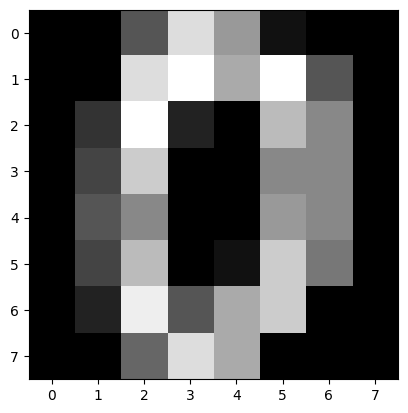

In [23]:
# Напишите Ваш код в этой ячейке
plt.imshow(pixels_array.reshape((8, 8)), cmap='gray', interpolation='nearest')

<Axes: >

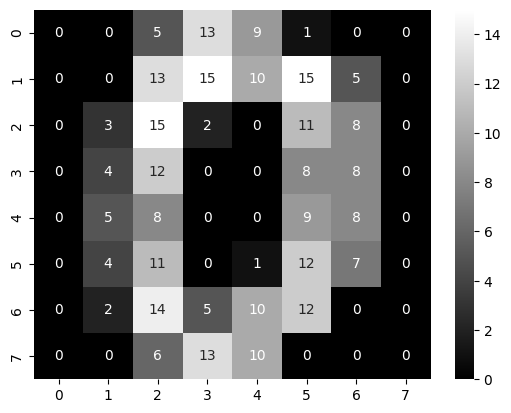

In [24]:
sns.heatmap(pixels_array.reshape((8, 8)),annot=True,cmap='gray')

------

Далее мы перейдём к методу главных компонент.

## Масштабирование данных

**Задание: с помощью Scikit-Learn выполните масштабирование датафрейма с пикселями.**

In [28]:
# Напишите Ваш код в этой ячейке
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [31]:
scaled_X = scaler.fit_transform(pixels)

In [32]:
scaled_X

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]], shape=(1797, 64))

## Метод главных компонент (PCA - Principal Component Analysis)

**Задание: примените метод главных компонент к промасштабированному набору пикселей, выделяя 2 главные компоненты.**

In [33]:
# Напишите Ваш код в этой ячейке
from sklearn.decomposition import PCA

In [34]:
model = PCA(n_components=2)

In [35]:
pca_pixels = model.fit_transform(scaled_X)

**Задание: выясните, сколько вариативности объясняется этими 2 главными компонентами.**

In [37]:
# Напишите Ваш код в этой ячейке
np.sum(model.explained_variance_ratio_)

np.float64(0.21594970500832816)

**Задание: постройте график scatterplot для цифр в 2-мерном пространстве главных компонент, раскрашивая график разными цветами на основе колонки number_label в исходном датафрейме.**

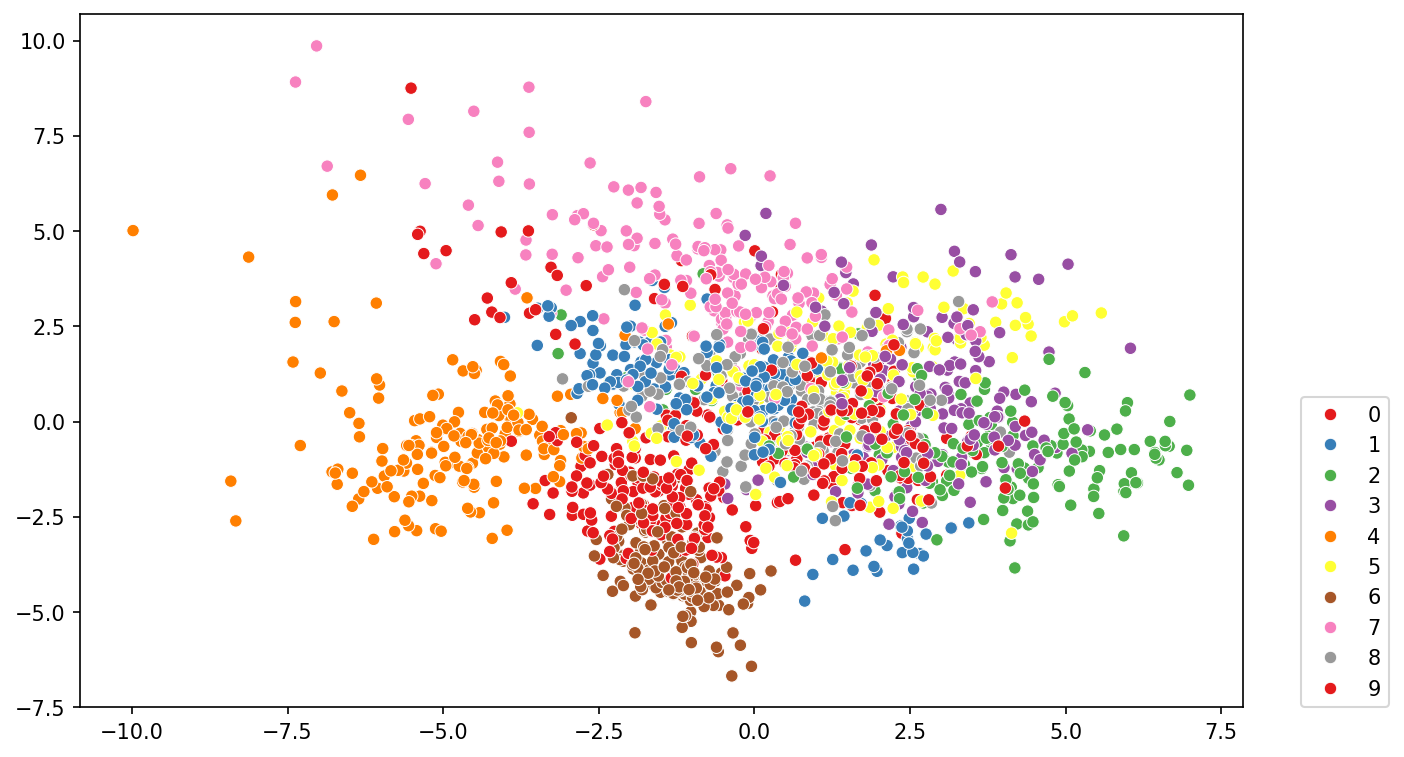

In [42]:
# Напишите Ваш код в этой ячейке
plt.figure(figsize=(10,6),dpi=150)
labels = df['number_label'].values
sns.scatterplot(x=pca_pixels[:,0],y=pca_pixels[:,1],hue=labels,palette='Set1')
plt.legend(loc=(1.05,0))

**Задание: какие цифры наиболее чётко отделимы друг от друга?**

In [43]:
# Напишите Ваш ответ в этой ячейке

# лучше всего отделима цифра 4,
# а также цифры 2, 6  и 9.

**Задание: постройте 3D-график с результатыми работы метода главных компонент для 3 главных компонент.**

In [44]:
# Напишите Ваш код в этой ячейке
from mpl_toolkits import mplot3d

In [48]:
model = PCA(n_components=3)

In [49]:
pca_pixels = model.fit_transform(scaled_X)

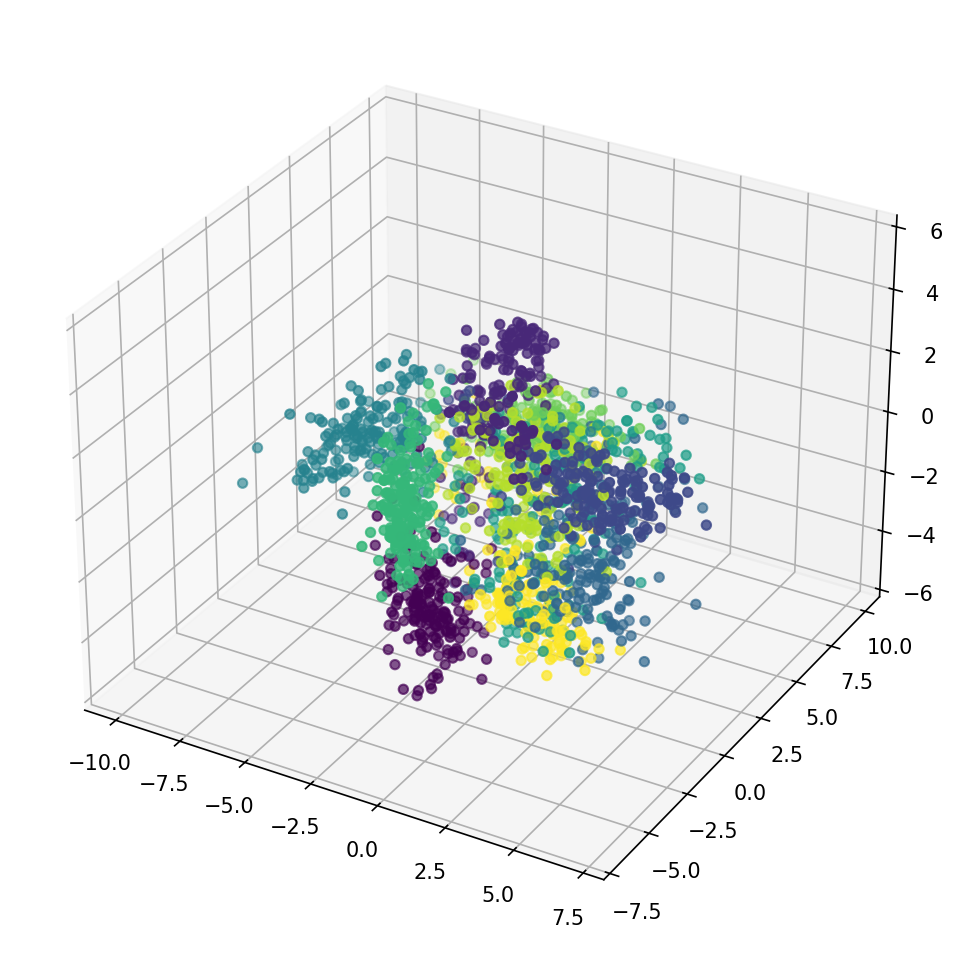

In [50]:
plt.figure(figsize=(8,8),dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(xs=pca_pixels[:,0],ys=pca_pixels[:,1],zs=pca_pixels[:,2],c=df['number_label']);

## Отличная работа!

---